In [2]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#load the dataset  -  you may need to replace the path of the datafile
from scipy.io import arff
rawdata1=arff.loadarff("/Users/Jessie/Documents/JupyterNotebook/ass1data/steelplatesfault.arff")
rawdata2=arff.loadarff("/Users/Jessie/Documents/JupyterNotebook/ass1data/ionosphere.arff")
rawdata3=arff.loadarff("/Users/Jessie/Documents/JupyterNotebook/ass1data/banknotes.arff")

#load the raw data into dataframe
import pandas as pd
df1=pd.DataFrame(rawdata1[0])
df2=pd.DataFrame(rawdata2[0])
df3=pd.DataFrame(rawdata3[0])

In [5]:
#load features into X, labels into labels
x1=df1.iloc[:,0:33].values
labels1=df1.iloc[:,-1].values

x2=df2.iloc[:,0:34].values
labels2=df2.iloc[:,-1].values

x3=df3.iloc[:,0:4].values
labels3=df3.iloc[:,-1].values


(1941, 33)

In [6]:
#decode the class lable
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit([b'1', b'2'])

le2 = preprocessing.LabelEncoder()
le2.fit([b'g', b'b'])

le3 = preprocessing.LabelEncoder()
le3.fit([b'1', b'2'])
#le.transform(labels)
#print(labels)



LabelEncoder()

In [7]:
list(le1.classes_)
label1=le1.transform(labels1)

list(le2.classes_)
label2=le2.transform(labels2)

list(le3.classes_)
label3=le3.transform(labels3)


1    0.407600
2    0.365273
3    0.378270
4    0.362266
5    0.367662
dtype: float64 Best Mean error: 0.362
1    0.144773
2    0.114091
3    0.162273
4    0.140455
5    0.168864
dtype: float64 Best Mean error: 0.114
1    0.000700
2    0.000321
3    0.000612
4    0.000204
5    0.000583
dtype: float64 Best Mean error: 0.0


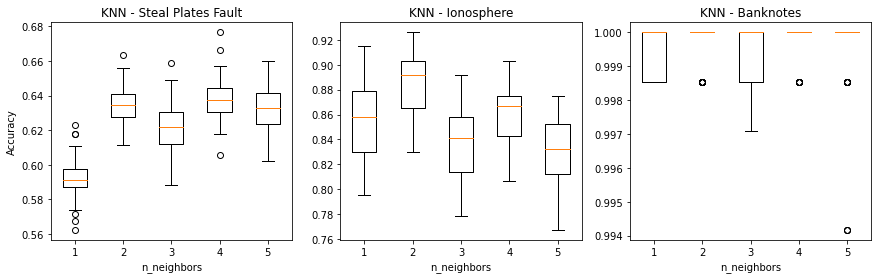

In [12]:
#knn
from sklearn.neighbors import KNeighborsClassifier

knn_seed=123
knn_x=[1,2,3,4,5]
knn_y1=[]
knn_y2=[]
knn_y3=[]
for j in range(50):
    knn_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=knn_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=knn_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=knn_seed)
                
    knn_para=0
    knn_acc1=[]
    knn_acc2=[]
    knn_acc3=[]
    
    for i in knn_x:
        knn_para=i
        knnmodel = KNeighborsClassifier(n_neighbors=knn_para)
        knnmodel.fit(x1_train, y1_train)
        y1_pred = knnmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        knn_acc1.append(acc1)   
        
        knnmodel.fit(x2_train, y2_train)
        y2_pred = knnmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        knn_acc2.append(acc2)
        
        knnmodel.fit(x3_train, y3_train)
        y3_pred = knnmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        knn_acc3.append(acc3)
        
    knn_y1.append(knn_acc1)
    knn_y2.append(knn_acc2)
    knn_y3.append(knn_acc3)
#print(knn_x, knn_y1)
import matplotlib.pyplot as plt
df1_knn = pd.DataFrame(knn_y1)
df2_knn = pd.DataFrame(knn_y2)
df3_knn = pd.DataFrame(knn_y3)

df1_knn.columns=knn_x
df2_knn.columns=knn_x
df3_knn.columns=knn_x

fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(df1_knn, labels=knn_x)
axs[0].set_title('KNN - Steal Plates Fault')
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_knn, labels=knn_x)
axs[1].set_title('KNN - Ionosphere')
axs[1].set_xlabel('n_neighbors')

axs[2].boxplot(df3_knn, labels=knn_x)
axs[2].set_title('KNN - Banknotes')
axs[2].set_xlabel('n_neighbors')

fig.subplots_adjust(left=0.1, right=2)

#print test errors, best mean error
print(1-df1_knn.mean(), 'Best Mean error:', round(min(1-df1_knn.mean()),3))
print(1-df2_knn.mean(), 'Best Mean error:', round(min(1-df2_knn.mean()),3))
print(1-df3_knn.mean(), 'Best Mean error:', round(min(1-df3_knn.mean()),3))

1.000000e-09    0.497775
1.000000e-05    0.480906
1.000000e-01    0.362575
dtype: float64 Best Mean error: 0.363
1.000000e-09    0.114205
1.000000e-05    0.122273
1.000000e-01    0.143750
dtype: float64 Best Mean error: 0.114
1.000000e-09    0.154927
1.000000e-05    0.154956
1.000000e-01    0.171778
dtype: float64 Best Mean error: 0.155


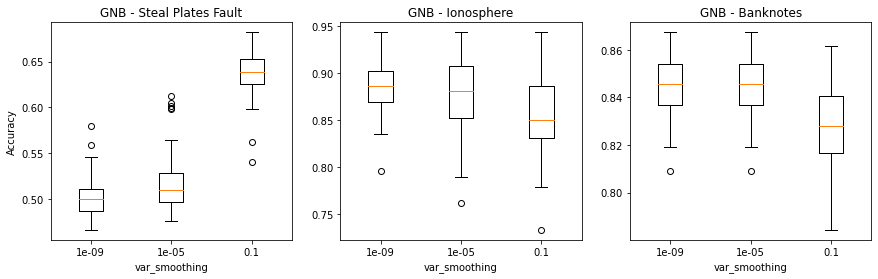

In [13]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import train_test_split
gnb_seed=123

gnb_x=[1e-9,1e-5,1e-1]
gnb_y1=[]
gnb_y2=[]
gnb_y3=[]
for j in range(50):
    gnb_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=gnb_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=gnb_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=gnb_seed)
    
    gnb_para=0
    gnb_acc1=[]
    gnb_acc2=[]
    gnb_acc3=[]
      
    for i in gnb_x:
        gnb_para=i

        gnbmodel = GaussianNB(var_smoothing=gnb_para)
        gnbmodel.fit(x1_train, y1_train)
        y1_pred = gnbmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        gnb_acc1.append(acc1)   
        
        gnbmodel.fit(x2_train, y2_train)
        y2_pred = gnbmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        gnb_acc2.append(acc2)
        
        gnbmodel.fit(x3_train, y3_train)
        y3_pred = gnbmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        gnb_acc3.append(acc3)
        
    gnb_y1.append(gnb_acc1)
    gnb_y2.append(gnb_acc2)
    gnb_y3.append(gnb_acc3)
#print(gnb_x)

df1_gnb = pd.DataFrame(gnb_y1)
df2_gnb = pd.DataFrame(gnb_y2)
df3_gnb = pd.DataFrame(gnb_y3)

df1_gnb.columns=gnb_x
df2_gnb.columns=gnb_x
df3_gnb.columns=gnb_x

fig, axs = plt.subplots(1, 3)

axs[0].boxplot(df1_gnb, labels=gnb_x)
axs[0].set_title('GNB - Steal Plates Fault')
axs[0].set_xlabel('var_smoothing')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_gnb, labels=gnb_x)
axs[1].set_title('GNB - Ionosphere')
axs[1].set_xlabel('var_smoothing')

axs[2].boxplot(df3_gnb, labels=gnb_x)
axs[2].set_title('GNB - Banknotes')
axs[2].set_xlabel('var_smoothing')

fig.subplots_adjust(left=0.1, right=2)

#print test errors, best mean error
print(1-df1_gnb.mean(), 'Best Mean error:', round(min(1-df1_gnb.mean()),3))
print(1-df2_gnb.mean(), 'Best Mean error:', round(min(1-df2_gnb.mean()),3))
print(1-df3_gnb.mean(), 'Best Mean error:', round(min(1-df3_gnb.mean()),3))

0.1    0.661050
0.5    0.661195
1.0    0.660247
2.0    0.659567
5.0    0.661050
dtype: float64
0.1    0.858068
0.5    0.866136
1.0    0.866591
2.0    0.867273
5.0    0.867273
dtype: float64 0.1    0.024174
0.5    0.019954
1.0    0.020381
2.0    0.019337
5.0    0.019405
dtype: float64
0.1    0.982478
0.5    0.988280
1.0    0.988950
2.0    0.988834
5.0    0.988630
dtype: float64
0.1    0.338950
0.5    0.338805
1.0    0.339753
2.0    0.340433
5.0    0.338950
dtype: float64 Best Mean error: 0.339
0.1    0.141932
0.5    0.133864
1.0    0.133409
2.0    0.132727
5.0    0.132727
dtype: float64 Best Mean error: 0.133 standart divation:  0.1    0.024174
0.5    0.019954
1.0    0.020381
2.0    0.019337
5.0    0.019405
dtype: float64
0.1    0.017522
0.5    0.011720
1.0    0.011050
2.0    0.011166
5.0    0.011370
dtype: float64 Best Mean error: 0.011


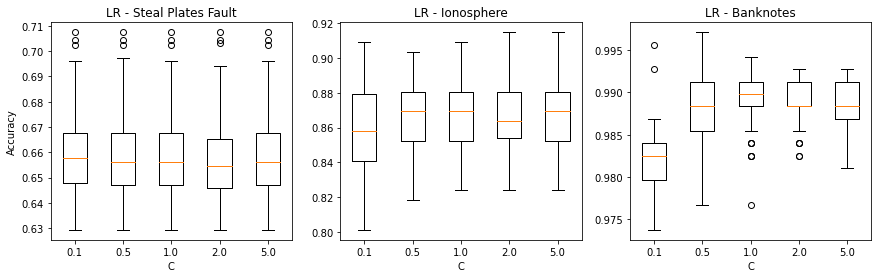

In [14]:
#LR
from sklearn.linear_model import LogisticRegression
lg_seed=123

lg_x=[0.1,0.5,1.0,2.0,5.0]
lg_y1=[]
lg_y2=[]
lg_y3=[]

for j in range(50):
    lg_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=lg_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=lg_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=lg_seed)
            
    lg_para=0
    lg_acc1=[]
    lg_acc2=[]
    lg_acc3=[]
    
    for i in lg_x:
        lg_para=i
        lgmodel = LogisticRegression(C=lg_para,max_iter=400)
        lgmodel.fit(x1_train, y1_train)
        y1_pred = lgmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        lg_acc1.append(acc1)   
        
        lgmodel.fit(x2_train, y2_train)
        y2_pred = lgmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        lg_acc2.append(acc2)
        
        lgmodel.fit(x3_train, y3_train)
        y3_pred = lgmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        lg_acc3.append(acc3)
        
    lg_y1.append(lg_acc1)
    lg_y2.append(lg_acc2)
    lg_y3.append(lg_acc3)
#print(lg_x)
#import matplotlib.pyplot as plt
df1_lg = pd.DataFrame(lg_y1)
df2_lg = pd.DataFrame(lg_y2)
df3_lg = pd.DataFrame(lg_y3)

df1_lg.columns=lg_x
df2_lg.columns=lg_x
df3_lg.columns=lg_x

fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(df1_lg, labels=lg_x)
axs[0].set_title('LR - Steal Plates Fault')
axs[0].set_xlabel('C')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_lg, labels=lg_x)
axs[1].set_title('LR - Ionosphere')
axs[1].set_xlabel('C')

axs[2].boxplot(df3_lg, labels=lg_x)
axs[2].set_title('LR - Banknotes')
axs[2].set_xlabel('C')

fig.subplots_adjust(left=0.1, right=2)

#print test errors, best mean error
print(1-df1_lg.mean(), 'Best Mean error:', round(min(1-df1_lg.mean()),3))
print(1-df2_lg.mean(), 'Best Mean error:', round(min(1-df2_lg.mean()),3),'standart divation: ',df2_lg.std())
print(1-df3_lg.mean(), 'Best Mean error:', round(min(1-df3_lg.mean()),3))

1     0.348507
3     0.148218
5     0.029907
8     0.000000
10    0.000000
dtype: float64 Best Mean error: 0.0
1     0.187273
3     0.126818
5     0.123750
8     0.123295
10    0.128750
dtype: float64 Best Mean error: 0.123
1     0.155015
3     0.073120
5     0.027405
8     0.020641
10    0.020845
dtype: float64 Best Mean error: 0.021


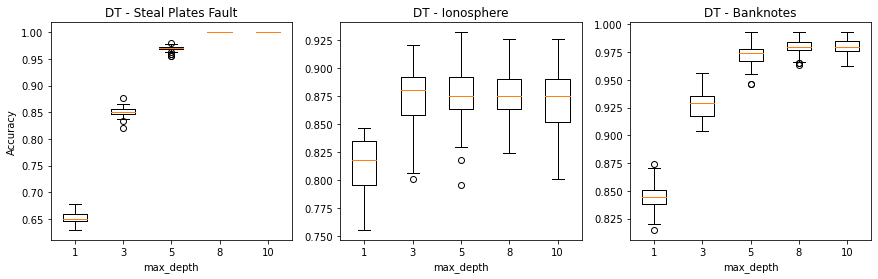

In [15]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_seed=123
dt_y1=[]
dt_y2=[]
dt_y3=[]
dt_x=[1,3,5,8,10]
for j in range(50):
    
    dt_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=dt_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=dt_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=dt_seed)
    
    dt_para=0
    dt_acc1=[]
    dt_acc2=[]
    dt_acc3=[]
    for i in dt_x:
        dt_para=i     
        dtmodel = DecisionTreeClassifier(max_depth=dt_para)
        dtmodel.fit(x1_train, y1_train)
        y1_pred = dtmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        dt_acc1.append(acc1)   
        
        dtmodel.fit(x2_train, y2_train)
        y2_pred = dtmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        dt_acc2.append(acc2)
        
        dtmodel.fit(x3_train, y3_train)
        y3_pred = dtmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        dt_acc3.append(acc3)
        
    dt_y1.append(dt_acc1)
    dt_y2.append(dt_acc2)
    dt_y3.append(dt_acc3)
#print(dt_x)
#import matplotlib.pyplot as plt
df1_dt = pd.DataFrame(dt_y1)
df2_dt = pd.DataFrame(dt_y2)
df3_dt = pd.DataFrame(dt_y3)

df1_dt.columns=dt_x
df2_dt.columns=dt_x
df3_dt.columns=dt_x

fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(df1_dt, labels=dt_x)
axs[0].set_title('DT - Steal Plates Fault')
axs[0].set_xlabel('max_depth')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_dt, labels=dt_x)
axs[1].set_title('DT - Ionosphere')
axs[1].set_xlabel('max_depth')

axs[2].boxplot(df3_dt, labels=dt_x)
axs[2].set_title('DT - Banknotes')
axs[2].set_xlabel('max_depth')

fig.subplots_adjust(left=0.1, right=2)

#print test errors, best mean error
print(1-df1_dt.mean(), 'Best Mean error:', round(min(1-df1_dt.mean()),3))
print(1-df2_dt.mean(), 'Best Mean error:', round(min(1-df2_dt.mean()),3))
print(1-df3_dt.mean(), 'Best Mean error:', round(min(1-df3_dt.mean()),3))

1     0.0
3     0.0
5     0.0
8     0.0
10    0.0
dtype: float64 Best Mean error: 0.0
1     0.086136
3     0.083409
5     0.120341
8     0.118636
10    0.123182
dtype: float64 Best Mean error: 0.083
1     0.035685
3     0.009184
5     0.015714
8     0.020554
10    0.020671
dtype: float64 Best Mean error: 0.009


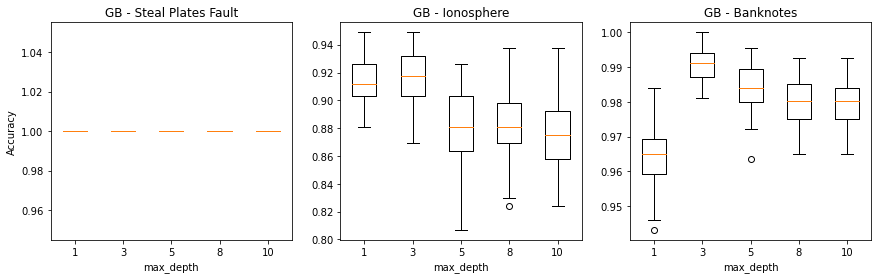

In [16]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_seed=123
gb_y1=[]
gb_y2=[]
gb_y3=[]
gb_x=[1,3,5,8,10]
for j in range(50):
    
    gb_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=gb_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=gb_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=gb_seed)
    
    gb_para=0
    gb_acc1=[]
    gb_acc2=[]
    gb_acc3=[]
    for i in gb_x:
        gb_para=i     
        gbmodel = GradientBoostingClassifier(max_depth=gb_para)
        gbmodel.fit(x1_train, y1_train)
        y1_pred = gbmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        gb_acc1.append(acc1)   
        
        gbmodel.fit(x2_train, y2_train)
        y2_pred = gbmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        gb_acc2.append(acc2)
        
        gbmodel.fit(x3_train, y3_train)
        y3_pred = gbmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        gb_acc3.append(acc3)
        
    gb_y1.append(gb_acc1)
    gb_y2.append(gb_acc2)
    gb_y3.append(gb_acc3)
#print(gb_x)
#import matplotlib.pyplot as plt
df1_gb = pd.DataFrame(gb_y1)
df2_gb = pd.DataFrame(gb_y2)
df3_gb = pd.DataFrame(gb_y3)

df1_gb.columns=gb_x
df2_gb.columns=gb_x
df3_gb.columns=gb_x

fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(df1_gb, labels=gb_x)
axs[0].set_title('GB - Steal Plates Fault')
axs[0].set_xlabel('max_depth')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_gb, labels=gb_x)
axs[1].set_title('GB - Ionosphere')
axs[1].set_xlabel('max_depth')

axs[2].boxplot(df3_gb, labels=gb_x)
axs[2].set_title('GB - Banknotes')
axs[2].set_xlabel('max_depth')

fig.subplots_adjust(left=0.1, right=2)

#print test errors, best mean error
print(1-df1_gb.mean(), 'Best Mean error:', round(min(1-df1_gb.mean()),3))
print(1-df2_gb.mean(), 'Best Mean error:', round(min(1-df2_gb.mean()),3))
print(1-df3_gb.mean(), 'Best Mean error:', round(min(1-df3_gb.mean()),3))

1     0.348507
3     0.168177
5     0.048980
8     0.019547
10    0.014809
dtype: float64 Best Mean error: 0.015
1     0.158523
3     0.077386
5     0.076250
8     0.076591
10    0.075227
dtype: float64 Best Mean error: 0.075
1     0.125860
3     0.047026
5     0.016093
8     0.009504
10    0.009534
dtype: float64 Best Mean error: 0.01


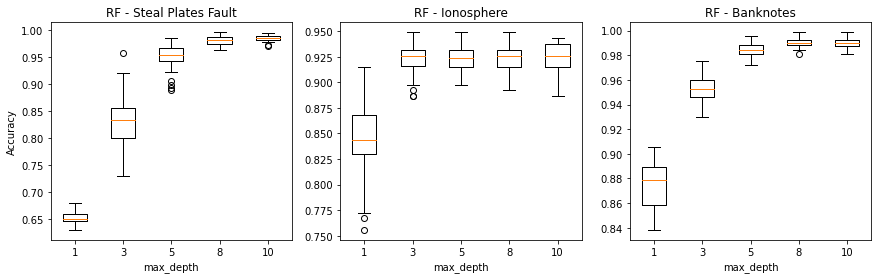

In [17]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_seed=123
rf_y1=[]
rf_y2=[]
rf_y3=[]
rf_x=[1,3,5,8,10]
for j in range(50):
    
    rf_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=rf_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=rf_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=rf_seed)
    
    rf_para=0
    rf_acc1=[]
    rf_acc2=[]
    rf_acc3=[]
    for i in rf_x:
        rf_para=i     
        rfmodel = RandomForestClassifier(max_depth=rf_para)
        rfmodel.fit(x1_train, y1_train)
        y1_pred = rfmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        rf_acc1.append(acc1)   
        
        rfmodel.fit(x2_train, y2_train)
        y2_pred = rfmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        rf_acc2.append(acc2)
        
        rfmodel.fit(x3_train, y3_train)
        y3_pred = rfmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        rf_acc3.append(acc3)
        
    rf_y1.append(rf_acc1)
    rf_y2.append(rf_acc2)
    rf_y3.append(rf_acc3)
#print(rf_x)
#import matplotlib.pyplot as plt
df1_rf = pd.DataFrame(rf_y1)
df2_rf = pd.DataFrame(rf_y2)
df3_rf = pd.DataFrame(rf_y3)

df1_rf.columns=rf_x
df2_rf.columns=rf_x
df3_rf.columns=rf_x

fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(df1_rf, labels=rf_x)
axs[0].set_title('RF - Steal Plates Fault')
axs[0].set_xlabel('max_depth')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_rf, labels=rf_x)
axs[1].set_title('RF - Ionosphere')
axs[1].set_xlabel('max_depth')

axs[2].boxplot(df3_rf, labels=rf_x)
axs[2].set_title('RF - Banknotes')
axs[2].set_xlabel('max_depth')

fig.subplots_adjust(left=0.1, right=2)

#print test errors, best mean error
print(1-df1_rf.mean(), 'Best Mean error:', round(min(1-df1_rf.mean()),3))
print(1-df2_rf.mean(), 'Best Mean error:', round(min(1-df2_rf.mean()),3))
print(1-df3_rf.mean(), 'Best Mean error:', round(min(1-df3_rf.mean()),3))




0.00001     0.419856
0.00100     0.426323
0.10000     0.425314
10.00000    0.426921
dtype: float64 Best Mean error: 0.42
0.00001     0.096818
0.00100     0.095227
0.10000     0.094886
10.00000    0.137386
dtype: float64 Best Mean error: 0.095
0.00001     0.000000
0.00100     0.000000
0.10000     0.000000
10.00000    0.017405
dtype: float64 Best Mean error: 0.0


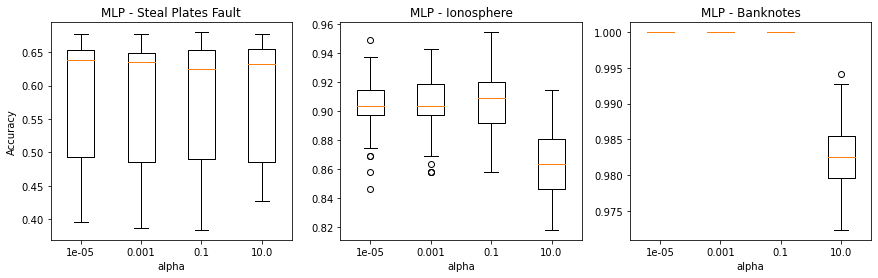

In [18]:
#MLPClassifier  - Multi layer perceptron
from sklearn.neural_network import MLPClassifier
mlp_seed=123
mlp_y1=[]
mlp_y2=[]
mlp_y3=[]
mlp_x=[1e-5,1e-3,0.1,10.0]
for j in range(50):
    
    mlp_seed+=100       
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, label1, test_size=0.5, random_state=mlp_seed)
    x2_train,x2_test,y2_train,y2_test=train_test_split(x2, label2, test_size=0.5, random_state=mlp_seed)
    x3_train,x3_test,y3_train,y3_test=train_test_split(x3, label3, test_size=0.5, random_state=mlp_seed)
    
    mlp_para=0
    mlp_acc1=[]
    mlp_acc2=[]
    mlp_acc3=[]
    for i in mlp_x:
        mlp_para=i     
        mlpmodel = MLPClassifier(alpha=mlp_para,max_iter=2000)
        mlpmodel.fit(x1_train, y1_train)
        y1_pred = mlpmodel.predict(x1_test)
        acc1=accuracy_score(y1_test,y1_pred)
        mlp_acc1.append(acc1)   
        
        mlpmodel.fit(x2_train, y2_train)
        y2_pred = mlpmodel.predict(x2_test)
        acc2=accuracy_score(y2_test,y2_pred)
        mlp_acc2.append(acc2)
        
        mlpmodel.fit(x3_train, y3_train)
        y3_pred = mlpmodel.predict(x3_test)
        acc3=accuracy_score(y3_test,y3_pred)
        mlp_acc3.append(acc3)
        
    mlp_y1.append(mlp_acc1)
    mlp_y2.append(mlp_acc2)
    mlp_y3.append(mlp_acc3)
#print(mlp_x)
#import matplotlib.pyplot as plt
df1_mlp = pd.DataFrame(mlp_y1)
df2_mlp = pd.DataFrame(mlp_y2)
df3_mlp = pd.DataFrame(mlp_y3)

df1_mlp.columns=mlp_x
df2_mlp.columns=mlp_x
df3_mlp.columns=mlp_x

fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(df1_mlp, labels=mlp_x)
axs[0].set_title('MLP - Steal Plates Fault')
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('Accuracy')

axs[1].boxplot(df2_mlp, labels=mlp_x)
axs[1].set_title('MLP - Ionosphere')
axs[1].set_xlabel('alpha')

axs[2].boxplot(df3_mlp, labels=mlp_x)
axs[2].set_title('MLP - Banknotes')
axs[2].set_xlabel('alpha')

fig.subplots_adjust(left=0.1, right=2)

print()
print()
print()
#print test errors, best mean error
print(1-df1_mlp.mean(), 'Best Mean error:', round(min(1-df1_mlp.mean()),3))
print(1-df2_mlp.mean(), 'Best Mean error:', round(min(1-df2_mlp.mean()),3))
print(1-df3_mlp.mean(), 'Best Mean error:', round(min(1-df3_mlp.mean()),3))
